# FINAL PROJECT
***

## Thành viên
- 19127642&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Võ Nhất Huy
- 19127592&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Lê Minh Trí
## Dataset
- HR Analytics: Job Change of Data Scientists
- Link: https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists
***

In [144]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import re
import plotly.express as px

## Thu nhập dữ liệu

In [145]:
aug_df = pd.read_csv('aug_train.csv')
aug_df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


### Có bao nhiêu dòng cột? Có dòng nào bị lặp không ?

In [146]:
num_rows = len(aug_df)
num_cols = len(aug_df.columns)
print(num_rows , num_cols)

19158 14


In [147]:
have_duplicated_rows = aug_df.duplicated().any()
have_duplicated_rows

False

---

## Khám phá dữ liệu

In [148]:
aug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

### Mỗi cột có ý nghĩa gì ?

In [149]:
with open('description.txt', 'r',encoding='utf-8') as f:
    print(f.read())

1) enrollee_id:                 Unique ID for candidate
2) city:                        City code
3) city_ development _index:    Developement index of the city (scaled)
4) gender:                      Gender of candidate
5) relevent_experience:         Relevant experience of candidate
6) enrolled_university:         Type of University course enrolled if any
7) education_level:             Education level of candidate
8) major_discipline:            Education major discipline of candidate
9) experience:                  Candidate total experience in years
10) company_size:               No of employees in current employer's company
11) company_type:               Type of current employer
12) lastnewjob:                 Difference in years between previous job and current job
13) training_hours:             training hours completed
14) target:                     0 – Not looking for job change, 1 – Looking for a job change


### Mỗi cột đang có kiểu dữ liệu gì? Các cột object đang tượng trưng cho các kiểu dữ liệu như thế nào?

In [150]:
col_dtypes = aug_df.dtypes
col_dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

Ta có thể thấy hầu hết các cột đều có kiểu object. 

Kiểu dữ liệu object thường ám chỉ hoặc tập hơn nhiều hơn một kiểu dữ liệu, có thể tập hợp giữa string, int hoặc đối tượng bất kỳ trong Python. 

Để chương trình có thể chạy nhanh và hoàn hảo hơn, ta nên áp dụng các phương pháp tiền xử lý để mã hoá, chuẩn hoá các giá trị này về dạng số.

---

## Tiền xử lý

### Categorical

Đầu tiên ta sẽ xử lý cột City trước, bởi vì các giá trị đều gắn liền với chữ city kèm index nên ta có thể loại bỏ chữ city đi.

Cuối cùng, ta chuyển cột City thành dạng số.

In [151]:
aug_df['city'] = aug_df['city'].str.replace("city_","")
aug_df['city'] = pd.to_numeric(aug_df['city'])
aug_df['city_development_index'] = aug_df['city_development_index'].round(decimals=3)

In [152]:
aug_df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


Tiếp theo, ta xử lý cột Gender với 4 tham số chính: Male, Female, Other và NaN. Nó có thể khá kì cục nếu một người không có giới tính nên ta có thể điền dữ liệu thiếu bằng cách điền giá trị xuất hiện nhiều nhất.

In [153]:
aug_df['gender']= aug_df['gender'].fillna("Undefined")

Đối với các cột còn lại, ta phải tiếp tục khám phá dữ liệu để có thể quyết định các phương pháp xử lý missing bởi vì nhìn sơ qua thì tỷ lệ missing_ratio khá cao ở các cột phía sau.

---

Các cột "relevent_experience", "enrolled_university", "education_level", "major_discipline", "company_type" đều có dạng là string. Ta phải check xem tỷ lệ giá trị thiếu của chúng là bao nhiêu trước khi đề ra phương pháp xử lý.

In [154]:
categorical_cols = ["relevent_experience", "enrolled_university", "education_level", "major_discipline", "company_type"]
profiles_cols = ["missing_ratio","num_diff_vals","diff_vals"]
profiles_rows = []

for col in categorical_cols:
    missing_ratio = aug_df[col].isnull().sum() * 100 / len(aug_df)
    diff = aug_df[col].dropna().unique()
    num_diff = len(diff)
    profiles_rows.append([missing_ratio,num_diff,diff])

cate_col_profiles_df = pd.DataFrame(data=np.array(profiles_rows).T,index=profiles_cols,columns=categorical_cols)

cate_col_profiles_df

/tmp/ipykernel_12775/4209786658.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cate_col_profiles_df = pd.DataFrame(data=np.array(profiles_rows).T,index=profiles_cols,columns=categorical_cols)


,relevent_experience,enrolled_university,education_level,major_discipline,company_type
missing_ratio,0.0,2.014824,2.401086,14.683161,32.049274
num_diff_vals,2,3,5,6,6
diff_vals,"[Has relevent experience, No relevent experience]","[no_enrollment, Full time course, Part time co...","[Graduate, Masters, High School, Phd, Primary ...","[STEM, Business Degree, Arts, Humanities, No M...","[Pvt Ltd, Funded Startup, Early Stage Startup,..."


Như ta có thể thấy, ngoại trừ cột "relevent_experience" ra thì các cột khác đều có tỷ lệ missing.

Đáng chú ý là hai cột "major_discipline", "company_type" có tỷ lệ khá cao, ta sẽ xử lý sau.

#### Numerical
Đối với các cột dữ liệu bị thiếu, sau khi quan sát các giá trị ở trong bảng dữ liệu, chúng em nhận ra ở đây tồn tại hai vấn đề:
- Dữ liệu trong các cột bị thiếu không hề đồng nhất. Đúng hơn là ở các cột `numeric` nó có chứa các giá trị như `<1, >4, 1000+, ...`, hay nói đúng hơn là chứa các miền giá trị
- Các miền giá trị có cách ghi không đồng nhất (company_size là trường hợp này)
Do đó, chúng em quyết định tách các cột này ra thành 2 loại để xử lí: cột không chứa miền giá trị (chỉ chứa các string) và cột chứa số có miền giá trị

Các cột "experience", "company_size", "last_new_job", "training_hours" có thể xem là cột numerical, nhưng...

Nếu ta xem lại phần Khám phá dữ liệu trước thì các cột này hầu hết đều là object bởi vì ngoài int ra thì còn có số dính với các dấu câu, có thể là '>', '<' hoặc '-'.

Có nhiều cách để xử lý để hoàn toàn đổi các cột này thành numerical nhưng nhóm em thống nhất cách như sau:
+ Đối với dấu '>' hoặc '<' thì ta chỉ cần đổi giới hạn đi cùng thành giá trị + 1. Ví dụ: >20 = 21
+ Đối với dấu '-' tức khoảng từ đâu tới đâu, ta sẽ lấy số trung bình giữa hai giới hạn. Ví dụ: 50-99 = 75

Trước tiên ta sẽ xem tỷ lệ missing và các giá trị có trong các cột như thế nào.

In [155]:
numerical_cols = ["experience", "company_size", "last_new_job", "training_hours"]
profiles_cols = ["missing_ratio","num_diff_vals","diff_vals"]
profiles_rows = []

for col in numerical_cols:
    missing_ratio = aug_df[col].isnull().sum() * 100 / len(aug_df)
    diff = aug_df[col].dropna().unique()
    num_diff = len(diff)
    profiles_rows.append([missing_ratio,num_diff,diff])

num_col_profiles_df = pd.DataFrame(data=np.array(profiles_rows).T,index=profiles_cols,columns=numerical_cols)

num_col_profiles_df

/tmp/ipykernel_12775/1552378618.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  num_col_profiles_df = pd.DataFrame(data=np.array(profiles_rows).T,index=profiles_cols,columns=numerical_cols)


,experience,company_size,last_new_job,training_hours
missing_ratio,0.339284,30.994885,2.207955,0.0
num_diff_vals,22,8,6,241
diff_vals,"[>20, 15, 5, <1, 11, 13, 7, 17, 2, 16, 1, 4, 1...","[50-99, <10, 10000+, 5000-9999, 1000-4999, 10/...","[1, >4, never, 4, 3, 2]","[36, 47, 83, 52, 8, 24, 18, 46, 123, 32, 108, ..."


Cột "company_size" có tới 31% tỷ lệ thiếu, khá cao tượng tự như hai cột bên categorical là "major_discipline", "company_type".

Nếu để ý thì các cột có giá trị thiếu đều liên quan tới việc tốt nghiệp và làm việc của các thí sinh.

### Tiền xử lý (tiếp tục)

#### Xử lý số

Đầu tiên ta phải tiền xử lý các cột numerical trước khi khám phá sâu hơn về dữ liệu. Bởi vì cột training hours đều là số nguyên nên không cần thiết phải xử lý, ta chỉ cần để ý 3 cột còn lại.

In [156]:
numerical_cols = ["experience", "company_size", "last_new_job"]

def preprocessing_delimiter(value):
    if type(value) is str:
        if ">" in value:
            value = int(value.replace(">","")) + 1
        elif "<" in value:
            value = int(value.replace("<","")) - 1
        elif "+" in value:
            value = int(value.replace("+",""))
        elif "-" in value:
            value_split = value.split("-")
            value_split = [int(i) for i in value_split]
            value = round((value_split[0] + value_split[1]) / 2,0)
        elif "/" in value:
            value_split = value.split("/")
            value_split = [int(i) for i in value_split]
            value = round((value_split[0] + value_split[1]) / 2,0)
        elif "never" in value:
            value = 0
    return value


for col in numerical_cols:
    aug_df[col] = pd.to_numeric(aug_df[col].apply(preprocessing_delimiter))

##### Xử lý missing value

Dựa theo ý kiến của nhóm em, các cột có tỷ lệ missing thấp sẽ được điền các giá trị thiếu còn những cột có tỷ lệ cao sẽ giữ nguyên bởi vì xử lý missing quá nhiều có thể làm dữ liệu bị noisy và sai lệch khá nhiều so với thực tế. Vậy ta sẽ xử lý các cột "enrolled_university", "education_level", "experience" và "last_new_job".

Ta sẽ xử lý các cột này theo phương pháp truyền thống, với các cột categorical sẽ điền mode và numerical sẽ điền mean.

In [157]:
cate_missing_process_cols = ["enrolled_university","education_level"]
num_missing_process_cols = ["experience","last_new_job"]

for col in cate_missing_process_cols:
    aug_df[col] = aug_df[col].fillna(aug_df[col].mode()[0])

for col in num_missing_process_cols:
    aug_df[col] = aug_df[col].fillna(round(aug_df[col].mean(),0))

In [158]:
aug_df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,NaN,NaN,1.0,36,1.0
1,29725,40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,74.0,Pvt Ltd,5.0,47,0.0
2,11561,21,0.624,Undefined,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,0.0,83,0.0
3,33241,115,0.789,Undefined,No relevent experience,no_enrollment,Graduate,Business Degree,0.0,NaN,Pvt Ltd,0.0,52,1.0
4,666,162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,74.0,Funded Startup,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,1.0,42,1.0
19154,31398,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,4.0,52,1.0
19155,24576,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,74.0,Pvt Ltd,4.0,44,0.0
19156,5756,65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0.0,750.0,Pvt Ltd,2.0,97,0.0


### Câu hỏi
Như phần description có mô tả, target là cột cho biết là ứng viên nào thực sự muốn là việc cho công ty của họ, với `0 – Not looking for job change`, `1 – Looking for a job change`. Do vậy, mục tiêu của chúng ta là cột target này. Cụ thể chúng ta sẽ phân tích những cột còn lại có tác động như thế nào tới cột này.
Trước hết, việc cần làm là phân loại các cột này ra. Tại sao phải làm thế, và làm như thế nào?
- Việc phân loại các cột sẽ cho chúng ta một cái nhìn cụ thể hơn về tính chất của từng cột, từ đó đưa ra được những kết luận cho câu hỏi một cách chính xác hơn.
- Sau khi thảo luận, các cột được chia làm 3 nhóm: Giáo dục, môi trường làm việc và yếu tố cá nhân khác. Cụ thể như sau:
    - Giáo dục:
        - `enrolled_university`: Hình thức học đại học của ứng viên.
        - `education_level`: Trình độ học vấn.
        - `major_discipline`: Ngành học của ứng viên.
    - Môi trường làm việc:
        - `city/city_development_index`: Mã thành phố và chỉ số phát triển tương ứng.
        - `company_size`: Số lượng nhân viên hiện có trong công ty của ứng viên.
        - `company_type`: Loại công ty hiện tại của ứng viên
    - Yếu tô cá nhân khác:
        - `gender`: Giới tính.
        - `experience`: Kinh nghiệm nói chung của ứng viên, bao gồm kinh nghiệm các công việc không liên quan.
        - `relevent_experience`: Kinh nghiệm trong ngành của ứng viên.
        - `lastnewjob`: Khoảng thời gian kể từ lần nhảy việc cuối cùng so với hiện tại.
        - `training_hours`: Số giờ đào tạo mà ứng viên đã hoàn thành. Việc đào tạo ở đây được thực hiện bởi công ty đang tiến hành khảo sát.
Vì các yếu tố cá nhân liên quan trực tiếp tới ứng viên, nên câu hỏi đặt ra ở đây sẽ tập trung vào yếu tố giáo dục và môi trường làm việc. Các yếu tố cá nhân sẽ được kết hợp trong quá trình phân tích để đưa ra kết luận (thậm chí kết hợp cả giáo dục và môi trường làm việc nếu có sự liên hệ nào đó).
1. Các yếu tố giáo dục có ảnh hưởng đến cột target hay không? Nếu có thì ảnh hưởng như thế nào?
2. Các yếu tố môi trường làm việc có ảnh hưởng đến cột target hay không? Nếu có thì ảnh hưởng như thế nào?


### Trả lời câu hỏi

Trước hết, chúng ta hãy xét xem mỗi cột ở đây gồm những giá trị gì, và tỉ lệ giữa các giá trị đó thể hiện như thế nào

##### `enrolled_university`

<AxesSubplot:>

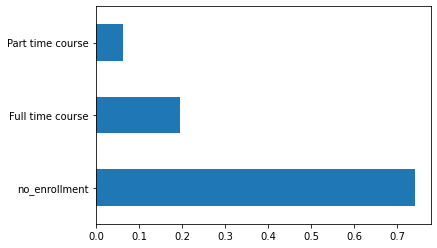

In [159]:
aug_df.enrolled_university.value_counts(normalize=True).plot(kind="barh")

##### `education_level`

<AxesSubplot:>

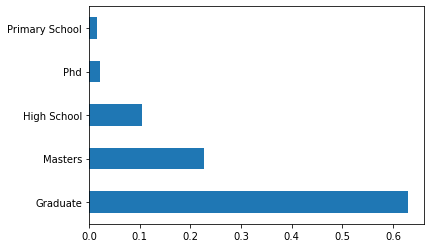

In [160]:
aug_df.education_level.value_counts(normalize=True).plot(kind="barh")

##### `major_discipline`

<AxesSubplot:>

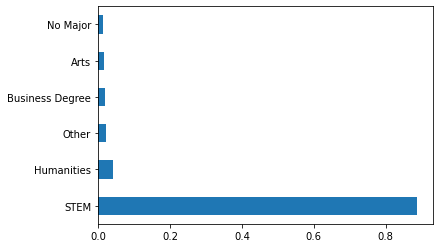

In [161]:
aug_df.major_discipline.value_counts(normalize=True).plot(kind="barh")

##### `gender`

<AxesSubplot:>

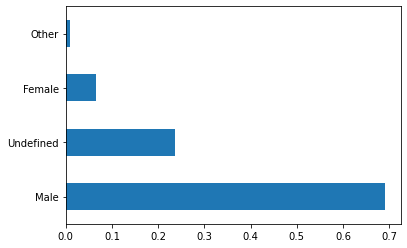

In [162]:
aug_df.gender.value_counts(normalize=True).plot(kind="barh")

##### `experience`

<AxesSubplot:>

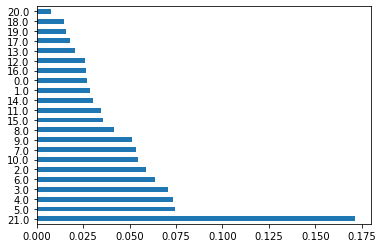

In [163]:
aug_df.experience.value_counts(normalize=True).plot(kind="barh")

##### `relevent_experience`

<AxesSubplot:>

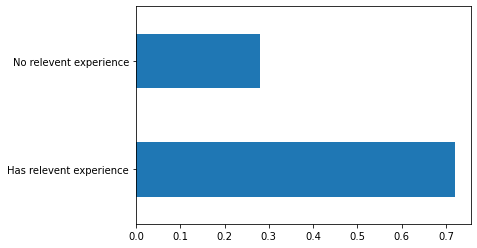

In [164]:
aug_df.relevent_experience.value_counts(normalize=True).plot(kind="barh")

##### `last_new_job`

<AxesSubplot:>

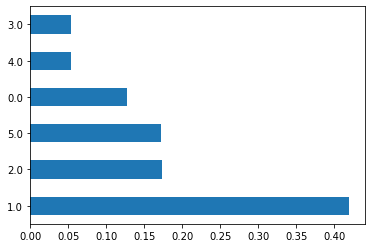

In [166]:
aug_df.last_new_job.value_counts(normalize=True).plot(kind="barh")

##### Ảnh hưởng của các yếu tố giáo dục
- Ta sẽ bắt đầu với những tác động đơn giản, cụ thể là tác động của từng cột lên target

In [179]:
count_series = aug_df.groupby(['enrolled_university', 'target']).size()
new_df = count_series.to_frame(name = 'count').reset_index()
new_df

,enrolled_university,target,count
0,Full time course,0.0,2326
1,Full time course,1.0,1431
2,Part time course,0.0,896
3,Part time course,1.0,302
4,no_enrollment,0.0,11159
5,no_enrollment,1.0,3044


In [180]:
count_series = aug_df.groupby(['education_level', 'target']).size()
new_df = count_series.to_frame(name = 'count').reset_index()
new_df

,education_level,target,count
0,Graduate,0.0,8709
1,Graduate,1.0,3349
2,High School,0.0,1623
3,High School,1.0,394
4,Masters,0.0,3426
5,Masters,1.0,935
6,Phd,0.0,356
7,Phd,1.0,58
8,Primary School,0.0,267
9,Primary School,1.0,41


In [181]:
count_series = aug_df.groupby(['major_discipline', 'target']).size()
new_df = count_series.to_frame(name = 'count').reset_index()
new_df

,major_discipline,target,count
0,Arts,0.0,200
1,Arts,1.0,53
2,Business Degree,0.0,241
3,Business Degree,1.0,86
4,Humanities,0.0,528
5,Humanities,1.0,141
6,No Major,0.0,168
7,No Major,1.0,55
8,Other,0.0,279
9,Other,1.0,102


***

2. .

### Kết luận